<a href="https://colab.research.google.com/github/chhak/Bigdata/blob/master/tf06_mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
"""
날짜 : 2020/08/19
이름 : 김철학
내용 : 딥러닝 mnist 이미지 분류 실습하기
"""
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from PIL import Image #파이썬 이미지 처리 라이브러리

In [4]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#구글드라이브 이미지 로드하기
img1 = Image.open('/content/drive/My Drive/Tensorflow_works/data/mnist_img1.jpg')
img2 = Image.open('/content/drive/My Drive/Tensorflow_works/data/mnist_img2.jpg')
img3 = Image.open('/content/drive/My Drive/Tensorflow_works/data/mnist_img3.jpg')
img4 = Image.open('/content/drive/My Drive/Tensorflow_works/data/mnist_img4.jpg')
img5 = Image.open('/content/drive/My Drive/Tensorflow_works/data/mnist_img5.jpg')

#이미지 파일의 픽셀값 추출
img1_px = np.array(img1)
img2_px = np.array(img2)
img3_px = np.array(img3)
img4_px = np.array(img4)
img5_px = np.array(img5)

img1_px

In [18]:
#학습데이터 로드
(mnist_train_data, mnist_train_label), (mnist_test_data, mnist_test_label) = load_data()

#데이터 형태 확인
print(mnist_train_data.shape, mnist_train_label.shape)
print(mnist_test_data.shape, mnist_test_label.shape)
print(mnist_train_label)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[5 0 4 ... 5 6 8]


[52325 19386 37075 47793 24105]


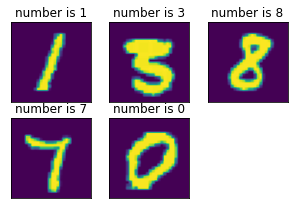

In [24]:
#데이터 샘플 이미지 출력
random_idx = np.random.randint(60000, size=5)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  label = mnist_train_label[idx]
  plt.imshow(mnist_train_data[idx, :])
  plt.title('number is %d' % label)


In [25]:
#데이터셋 분할하기
train_data, test_data, train_label, test_label = train_test_split(mnist_train_data, mnist_train_label)
print('훈련 데이터 :', train_data.shape)
print('검증 데이터 :', test_data.shape)

훈련 데이터 : (45000, 28, 28)
검증 데이터 : (15000, 28, 28)


In [28]:
#모델학습을 위한 데이터 전처리(정규화)
train_data = train_data / 255
test_data = test_data / 255
mnist_test_data = mnist_test_data / 255

#각 데이터의 레이블을 범주형(One-hot encoding) 형태로 변환
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
mnist_test_label = to_categorical(mnist_test_label)

In [29]:
#학습모델 구성하기
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #입력층
model.add(Dense(64, activation='relu'))  #은닉층
model.add(Dense(32, activation='relu'))  #은닉층
model.add(Dense(10, activation='softmax')) #출력층

In [31]:
#학습모델 설정하기
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#학습하기
model.fit(train_data,
          train_label,
          epochs=30,
          batch_size=128,
          validation_data=(test_data, test_label))


In [33]:
#평가하기
model.evaluate(mnist_test_data, mnist_test_label)

313/313 [==============================] - 0s 1ms/step - loss: 1.7121 - acc: 0.3461


[1.712110161781311, 0.34610000252723694]

In [ ]:
#테스트하기
result = model.predict(mnist_test_data)
result.round()